In [1]:
import numpy as np 
import pandas as pd 


In [2]:
df = pd.read_csv('data/Churn_Modelling.csv')

In [3]:
print("shape of data:",df.shape)
df.head()

shape of data: (10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.duplicated().sum()

0

In [6]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [7]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [8]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [9]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [12]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [13]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [15]:
# import tensorflow as tf

# cifar = tf.keras.datasets.cifar100
# (x_train, y_train), (x_test, y_test) = cifar.load_data()
# model = tf.keras.applications.ResNet50(
#     include_top=True,
#     weights=None,
#     input_shape=(32, 32, 3),
#     classes=100,)

# loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
# model.compile(optimizer="adam", loss=loss_fn, metrics=["accuracy"])
# model.fit(x_train, y_train, epochs=5, batch_size=64)

In [16]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [17]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/opt/anaconda3/envs/llm/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-01-05 00:29:00.607052: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
2025-01-05 00:29:00.607081: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-01-05 00:29:00.607086: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-01-05 00:29:00.607109: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-01-05 00:29:00.607122: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created Ten

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
history = model.fit(X_train_trf,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100


2025-01-05 00:29:01.629178: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6978 - loss: 0.6230 - val_accuracy: 0.7969 - val_loss: 0.4980
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7949 - loss: 0.4872 - val_accuracy: 0.7981 - val_loss: 0.4669
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8055 - loss: 0.4488 - val_accuracy: 0.8156 - val_loss: 0.4444
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8169 - loss: 0.4303 - val_accuracy: 0.8169 - val_loss: 0.4307
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8185 - loss: 0.4226 - val_accuracy: 0.8200 - val_loss: 0.4228
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8170 - loss: 0.4149 - val_accuracy: 0.8219 - val_loss: 0.4163
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8195 - loss: 0.4102 - val_accuracy: 0.8325 - val_loss: 0.4092
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8369 - loss: 0.3940 - val_accuracy: 0.8381

In [21]:
aq = model.layers[1].get_weights()
aq

[array([[ 4.51456487e-01,  5.49188368e-02, -4.45506215e-01,
         -4.08174209e-02,  4.08172309e-01, -5.33454828e-02,
         -7.35582709e-02, -3.65649670e-01, -7.59072006e-02,
         -2.41195425e-01,  2.21479740e-02],
        [ 4.84487534e-01, -1.01010013e+00, -1.81668356e-01,
          1.07840374e-01,  2.42714599e-01,  1.28061801e-01,
          1.09389715e-01,  3.03721011e-01, -9.46782947e-01,
          6.71473861e-01, -1.44090459e-01],
        [-2.60760456e-01, -1.39998102e+00,  2.04088762e-01,
          7.34805226e-01, -6.22909963e-01,  6.22787416e-01,
         -5.86903989e-02,  1.94226965e-01,  3.97073627e-02,
          2.14498475e-01,  1.37656242e-01],
        [-6.54754937e-01, -1.04803972e-01, -2.54341036e-01,
         -9.22416449e-01, -1.23882882e-01, -7.83385515e-01,
          2.60570198e-01, -2.12599430e-02,  1.26096189e-01,
         -4.40871388e-01,  2.17949763e-01],
        [-9.61355790e-02,  3.51141691e-01,  1.24088086e-01,
         -5.82321167e-01,  3.65303487e-01, -

In [22]:
aq[1].shape

(11,)

In [23]:
y_log = model.predict(X_test_trf)
y_log

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([[0.2936131 ],
       [0.31131643],
       [0.23321001],
       ...,
       [0.05636446],
       [0.12425788],
       [0.18122461]], dtype=float32)

In [24]:
y_pred = np.where(y_log>0.5,1,0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [25]:
y_pred = y_pred.argmax(axis=-1)# argmax() finds the index of the maximum value along a specified axis


In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

Text(0.5, 1.0, 'loss vs val_loss')

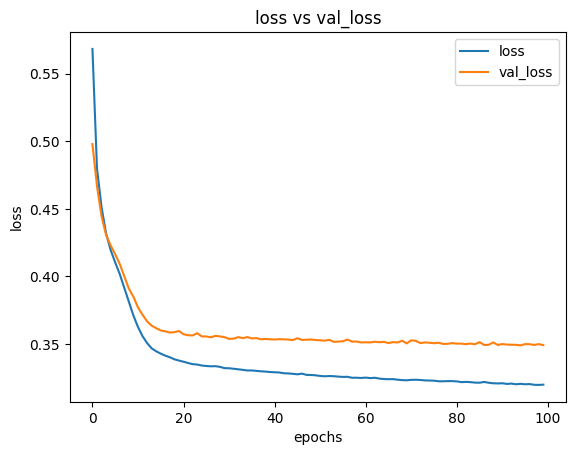

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['loss', 'val_loss'])
plt.title('loss vs val_loss')

Text(0.5, 1.0, 'accuracy vs val_accuracy')

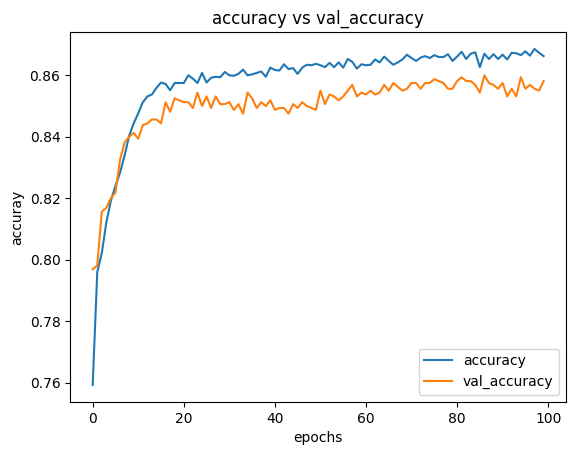

In [28]:
plt.plot(history.history['accuracy'],label = 'accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuray')
plt.legend(['accuracy', 'val_accuracy'])
plt.title('accuracy vs val_accuracy')